<a href="https://colab.research.google.com/github/Swaghanaian/Food-Sales-Predictions/blob/main/Food_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
filename = '/content/sales_predictions.csv'
df = pd.read_csv('/content/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#To find how many rows and columns
df.info()

#Tells us we have 8523 rows and 12 columns

#The output also tells us that there are 4 columns with the dtype float64, 1 column with the dtype int64 and 7 columns with the dtype object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# To Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [5]:
# Count the duplicates
df.duplicated().sum()

#The output shows there are no duplicates

0

In [6]:
#To identify missing values

df.isna().sum()

#Output shows 1463 values missing in Item_Weight column and 2410 values missing in Outlet_Size column

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
#These missing values may be material and since I am not an expert I will use my judgment to replace missing values with the word 'Missing' in the Outlet_Size column.

#To replace missing values with the word 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#I will also use my judgment to replace missing values in the Item_Weight column with the average of the Item_Weight column.
mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

#Verifying change for Outlet_Size column was successful and there are no missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
# Check the unique values and counts of the 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [10]:
# Fixing inconsistent categories of data LF to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()



Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
# Fixing inconsistent categories of data low fat to Low Fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()


Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [12]:
# Fixing inconsistent categories of data reg to Regular
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
#To show summary statistics for each column, limiting to 2 decimal places

df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


**To plot a univariate graph showing the Item Weight distribution**

Text(0, 0.5, 'Count')

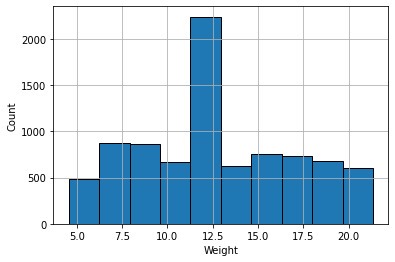

In [14]:
# To plot a histogram of the of Item Weight

import matplotlib.pyplot as plt

df['Item_Weight'].hist(edgecolor = 'black');
plt.xlabel('Weight');
plt.ylabel('Count')

The histogram tells us that the Items that have a weight of 12.5 are the highest percentage of the total count

**To plot 2 different multivariate graphs showing the relationship between some of the columns(Outlet Type, Outlet Sales & MRP)**

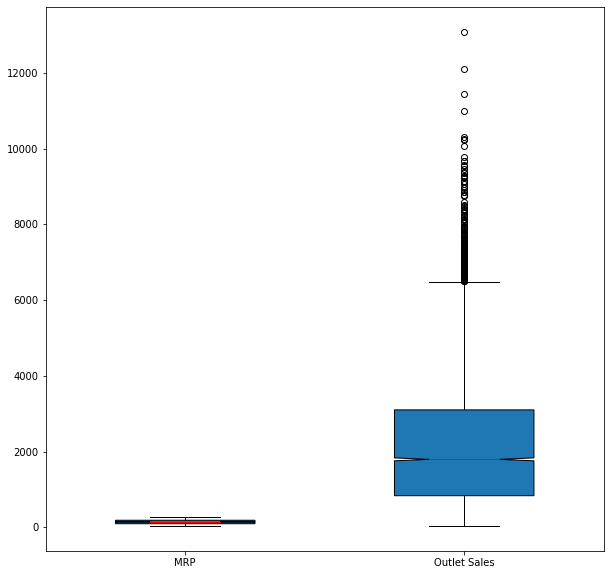

In [15]:
from IPython.core.pylabtools import figsize
mrp= df['Item_MRP']
sales = df['Item_Outlet_Sales']
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10) )
boxplots = axes.boxplot([mrp, sales], notch= True,labels = ['MRP','Outlet Sales'],
             widths = .5,
             patch_artist = True,
             medianprops = dict(linestyle = '-',linewidth = 1, color = 'red'),
             boxprops = dict(linestyle = '--', linewidth = 1, color = 'black'));



This boxplot shows that the different outlet types buy products at a very low cost and sell for High margins

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

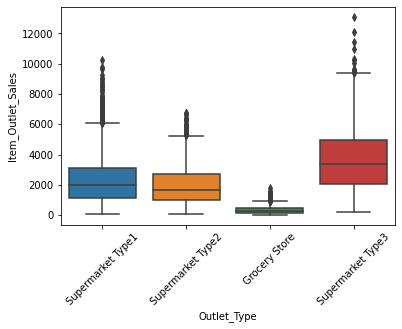

In [16]:
#To plot a boxplot graph of Outlet Type and Item Outlet Sales
import seaborn as sns
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 45)

The boxplot graph of Outlet Type and Item Outlet Sales shows that each of the Supermarket Outlet Types have greater sales than the Grocery Store.

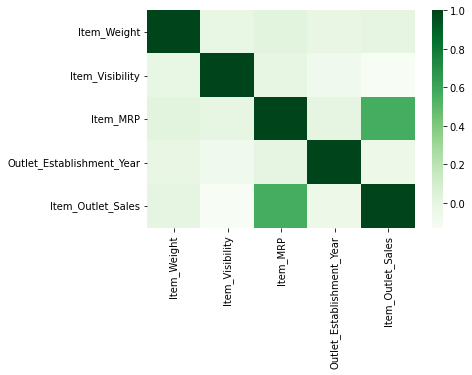

In [17]:
#To plot a heatmap correlation between features.
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens')

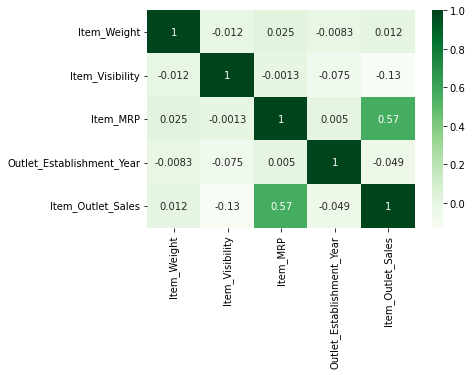

In [18]:
#Example 2 for Heatmap
sns.heatmap(corr, cmap = 'Greens', annot = True)

This heat map tells us that there is a moderate correlation between Item Outlet Sales and Item MRP

**To create two more visualizations to show the distribution of Outlet Sales per Outlet Type**

In [19]:
#Just creating a variable to summarize the visualization I am creating
Sales_per_outlet_type = df.groupby(['Outlet_Type'])['Item_Outlet_Sales']

In [20]:
Sales_per_outlet_type.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5577.0,2316.181148,1515.965558,73.2380,1151.16820,1990.7420,3135.91800,10256.6490
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,935.0,3694.038558,2127.760054,241.6854,2044.33890,3364.9532,4975.52340,13086.9648


In [24]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## **The first visualization will be a line plot using Matplotlib**

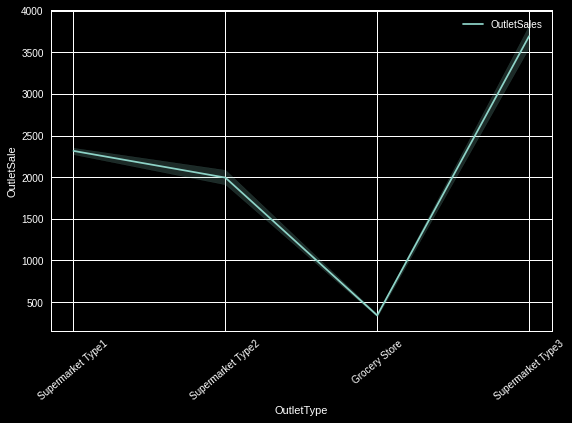

In [31]:
from traitlets.traitlets import Type
plt.style.use('dark_background')
sns.lineplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,label=f'OutletSales')
plt.xlabel('OutletType')
plt.ylabel('OutletSale')
plt.xticks(rotation=40)
plt.legend()

The visualization above shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales.

## **The second visualization will be a bar graph using Matplotlib**

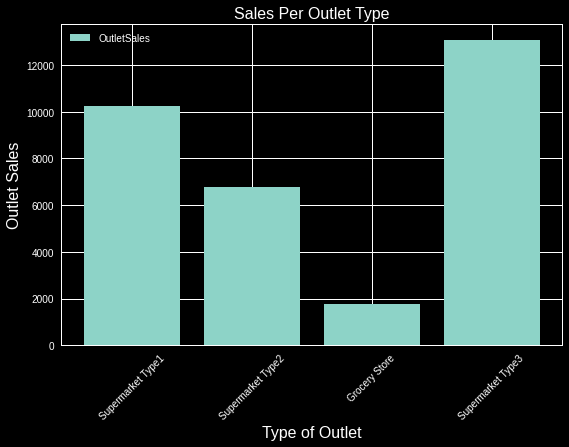

In [32]:
plt.bar('Outlet_Type', 'Item_Outlet_Sales',data=df, label='OutletSales')
plt.style.use('seaborn-pastel')
plt.xlabel('Type of Outlet', fontsize = 16)
plt.ylabel('Outlet Sales', fontsize = 16)
plt.title('Sales Per Outlet Type', fontsize = 16)
plt.xticks(rotation=45)
plt.legend()

This visualization above also shows that the Grocery Store has the least amount of sales and the Supermarket type 3 has the most Sales. In my opinion, this graph is easier to read and understand. Tried out the pastel chart style to see how it is.